In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
df = pd.read_csv("data/labeled_train.csv", index_col=0)
df.head()

,Jitter (local),Jitter (local absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Maximum pitch,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UNKNOWN,UPDRS,Class
ID,,,,,,,,,,,,,,,,,,,,,
1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [53]:
def create_model():
    model = Sequential()
    # single hidden layer between in and out
    model.add(Dense(NUM_FEATURES, input_dim=NUM_FEATURES, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal')) # predict UPDRS
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model



In [13]:
# features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp), 
# features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda), 
# features 12-14: AC,NTH,HTN, 
# features 15-19: Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch, 
# features 20-23: Number of pulses,Number of periods,Mean period,Standard deviation of period,
# features 24-26: Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks 
# column 28: UPDRS 
# column 29: class information 

# Each subject has 26 voice samples including sustained vowels, numbers, words and short 
# sentences. The voice samples in the training data file are given in the 
# following order: 

# sample# - corresponding voice samples 
# 1: sustained vowel (aaa) 
# 2: sustained vowel (ooo) 
# 3: sustained vowel (uuu) 
# 4-13: numbers from 1 to 10 
# 14-17: short sentences 
# 18-26: words 

# print(df.columns.values)
# print(df.get_value(1, "Class"))

data = df.values
X_train = data[:,0:-3]
y_train = df['Class'] 

print (df.shape)
NUM_FEATURES = X_train.shape[1]


(1040, 28)


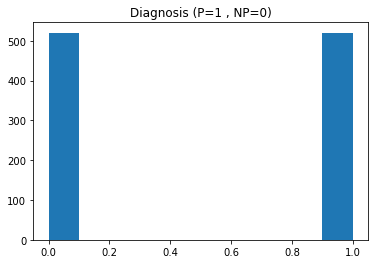

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(df['Class'])
plt.title('Diagnosis (P=1 , NP=0)')
plt.show()

In [16]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [22]:
from sklearn.linear_model import LogisticRegression
predictor_var = [df[:,0:-3]]
outcome_var='Class'
model=LogisticRegression()
classification_model(model,df,predictor_var,outcome_var)

TypeError: unhashable type: 'slice'

In [ ]:
seed = 7
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(NUM_FEATURES,input_dim=NUM_FEATURES,init='uniform', activation='linear'))
model.add(Dense(1,init='uniform', activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.fit(X_train, y_train, nb_epoch=1000, batch_size=26,verbose=1)
# model.fit(X_train, y_train, nb_epoch=1, batch_size=26,verbose=1)
# score = model.evaluate(X_test, y_test, batch_size=16)